<img src="logo.jpg" />

## [Pedram Jahangiry](https://github.com/PJalgotrader) 

# Decision Trees, Bagging and Random Forests

* Trees can be used for regression and classification. 
* Trees are non linear models. 

# 1. Decision Trees Regression:

Importing the packages:

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions

In [106]:
rand_state = 1000

In [107]:
df = pd.read_csv("wage.csv")

In [108]:
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.0
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.0
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.0
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.0


In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wage,935.0,957945.454545,404360.822474,115000.0,669000.0,905000.0,1160000.0,3078000.0
hours,935.0,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
married,935.0,0.893048,0.309217,0.0,1.0,1.0,1.0,1.0
black,935.0,0.128342,0.334650,0.0,0.0,0.0,0.0,1.0
meduc,857.0,10.682614,2.849756,0.0,8.0,12.0,12.0,18.0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
meduc      857 non-null float64
feduc      741 non-null float64
dtypes: float64(3), int64(8)
memory usage: 80.4 KB


## Data preprocessing 

In [111]:
df.isna().sum()  

wage         0
hours        0
IQ           0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
meduc       78
feduc      194
dtype: int64

In [112]:
df.drop('feduc', axis=1, inplace=True)

In [113]:
df['meduc'].fillna(df['meduc'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
meduc      935 non-null float64
dtypes: float64(2), int64(8)
memory usage: 73.1 KB


In [114]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

### Defining the variables and splitting the data

In [116]:
y = df['wage']
X = df.drop('wage', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [117]:
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc
932,45,77,12,12,10,28,1,1,7.0
82,40,96,11,15,3,37,1,0,8.0
370,40,123,17,14,7,38,1,0,12.0
452,40,109,12,14,1,36,1,0,9.0
132,40,97,12,10,4,31,1,0,12.0


## Scaling the features: 


For trees and random forests, there is no need to scale the features! (No distance metrics is used)

###  Tree Regression with Sklearn

In [118]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
# Fitting Tree regression to the Training set (we go with the defualt params)
Tree_regressor = DecisionTreeRegressor(random_state=rand_state, max_depth=3 )
Tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1000, splitter='best')

**Exercise 1**: If we want to do a fair comparison between DT model and other regression model, do we need to set the random state = rand_state in the DecisionTreeRegressor function?

In [136]:
# Predicting the Test set results
y_pred_test = Tree_regressor.predict(X_test)

In [137]:
predictions = pd.DataFrame({ 'y_actual_test':y_test,'y_pred_test':y_pred_test, 'resid':y_test - y_pred_test})
predictions.head()

,y_actual_test,y_pred_test,resid
434,975000.0,8.311207e+05,143879.310345
238,1730000.0,1.161706e+06,568293.785311
531,675000.0,8.854242e+05,-210424.242424
157,1899000.0,1.161706e+06,737293.785311
601,1500000.0,1.161706e+06,338293.785311


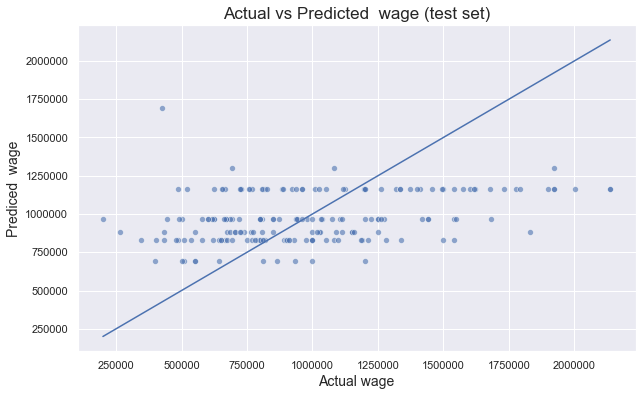

In [138]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

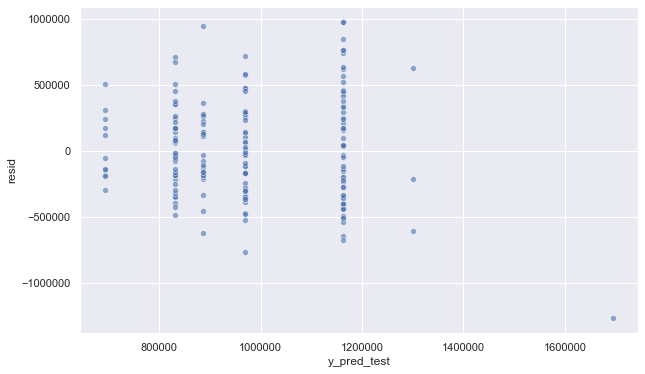

In [140]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='y_pred_test', y='resid' ,data=predictions, alpha=0.6)
plt.show()


### evaluating the model on test dataset

In [141]:
MSE_test = round(np.mean(np.square(y_test - y_pred_test)),2)
MSE_test

134012310348.53

In [142]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

366076.92

## Visualizing the Tree

Let's visualize one simple tree with two features only. 
First you need to install the packages graphviz and pydot by running these lines in your anaconda prompt.

1. conda install graphviz
2. pip install graphviz
3. pip install pydot

In [143]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [144]:
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc
932,45,77,12,12,10,28,1,1,7.0
82,40,96,11,15,3,37,1,0,8.0
370,40,123,17,14,7,38,1,0,12.0
452,40,109,12,14,1,36,1,0,9.0
132,40,97,12,10,4,31,1,0,12.0


In [167]:
temp = pd.DataFrame(X_train[['IQ', 'exper']])
temp['wage']=y_train
temp.head()

,IQ,exper,wage
932,77,12,538000.0
82,96,15,1200000.0
370,123,14,1442000.0
452,109,14,350000.0
132,97,10,1200000.0


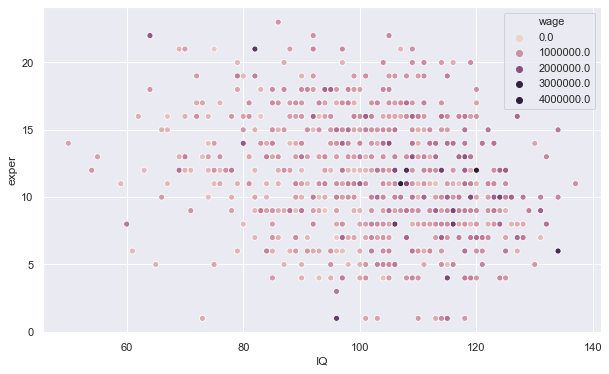

In [168]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='IQ', y='exper', data=temp, hue='wage')

In [171]:
dtree = DecisionTreeRegressor(max_depth=2)
dtree.fit(temp.drop('wage', axis=1), temp['wage'])
predict = dtree.predict(X_test[['IQ', 'exper']])
features= list(temp.columns[:-1])
features

['IQ', 'exper']

In [172]:
dtree

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

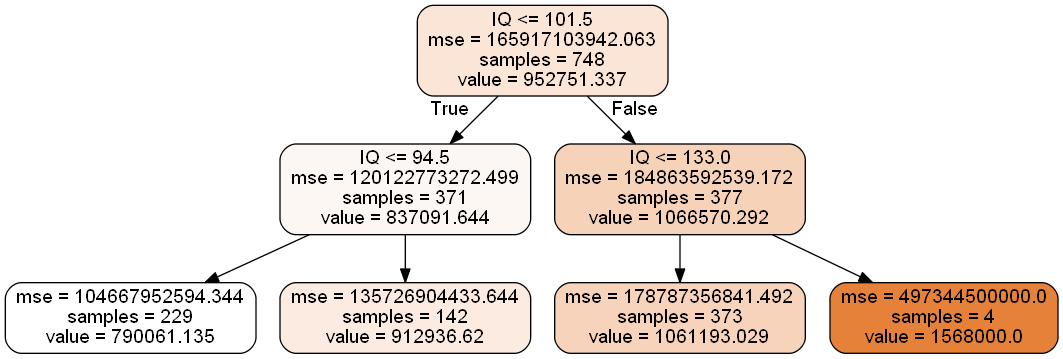

In [173]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True,rounded=True)
Tree = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(Tree[0].create_png())

In [174]:
# You can also save it as PDF
Tree[0].write_pdf("Tree.pdf")

### Do you want to see the regression line as well?

Let's try a tree regression with one feature only (say 'educ')

In [181]:
dtree= DecisionTreeRegressor(max_depth=2)
dtree.fit(X_train[['educ']], y_train)
wage_hat = dtree.predict(X_test[['educ']])

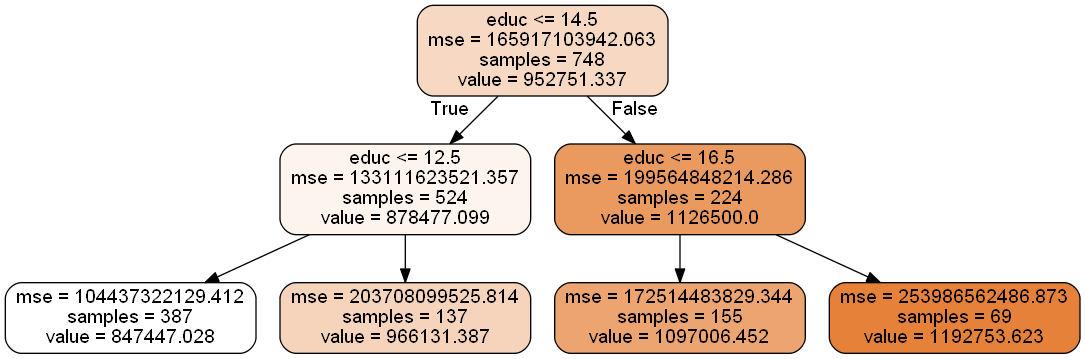

In [182]:
# visualizing the tree
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=['educ'], filled=True,rounded=True)
Tree = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(Tree[0].create_png())

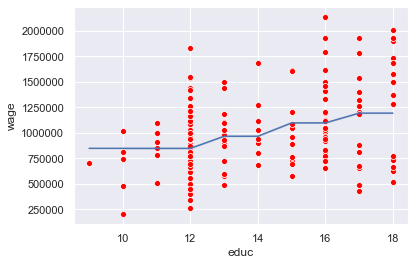

In [183]:
# visualizing the regression line
sns.scatterplot(X_test['educ'], y_test, color='red')
sns.lineplot(x=X_test['educ'], y=wage_hat)

# 2- Random Forest Regression

In [184]:
from sklearn.ensemble import RandomForestRegressor

In [198]:
# Fitting Random Forests regression to the Training set

RF_regressor = RandomForestRegressor(n_estimators = 100, max_features='sqrt')
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

* n_estimators : is the number of trees.
* max_features : m=sqrt(p)

In [199]:
# Predicting the Test set results
y_pred_test = RF_regressor.predict(X_test)

In [200]:
predictions = pd.DataFrame({ 'y_actual_test':y_test,'y_pred_test':y_pred_test, 'resid':y_test - y_pred_test})
predictions.head()

,y_actual_test,y_pred_test,resid
434,975000.0,830120.0,144880.0
238,1730000.0,1464140.0,265860.0
531,675000.0,653050.0,21950.0
157,1899000.0,1098470.0,800530.0
601,1500000.0,1058680.0,441320.0


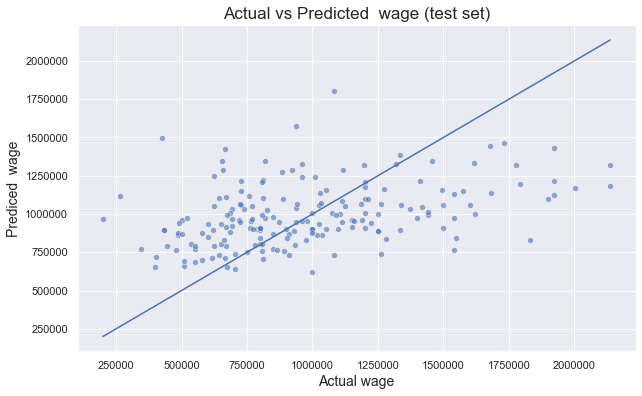

In [201]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

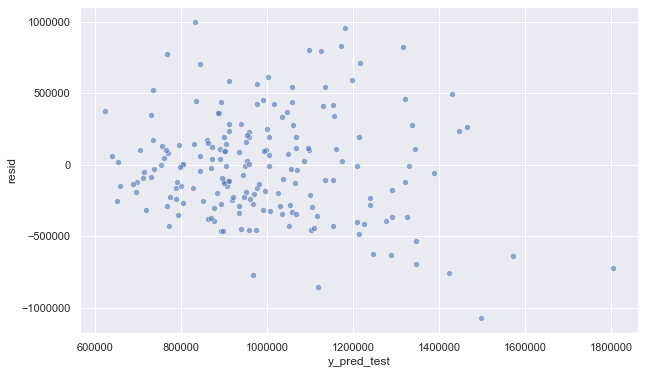

In [202]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='y_pred_test', y='resid' ,data=predictions, alpha=0.6)
plt.show()


### evaluating the Random Forests Regression model on test dataset

In [203]:
MSE_test = round(np.mean(np.square(y_test - y_pred_test)),2)
MSE_test

130544981585.03

In [204]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

361310.09

### Exercise: 
Use **Grid search** to find the optimal hyperparameters for *n_estimators* and *max_features*

In [219]:
param_grid = {'n_estimators': [10,100,1000], 'max_features':['sqrt'], 'max_depth':[2,5]}

In [220]:
from sklearn.model_selection import GridSearchCV

In [221]:
grid= GridSearchCV(RandomForestRegressor(random_state=rand_state), param_grid, refit=True, verbose=0, cv=5)

Is it necessary to set random_state=rand_state?

In [222]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1000,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 5], 'max_featu

In [223]:
grid.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 1000}

In [224]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=1000,
                      verbose=0, warm_start=False)

In [225]:
y_pred_test_optimized = grid.predict(X_test)

In [226]:
MSE_test = round(np.mean(np.square(y_test - y_pred_test_optimized)),2)
MSE_test

118430475332.77

In [227]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

344137.29

## Feature Importance Measure

In [229]:
features= list(X_train.columns)
features

['hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married', 'black', 'meduc']

In [236]:
RF_regressor = RandomForestRegressor(n_estimators = 1000, max_features='sqrt', max_depth=5)
RF_regressor.fit(X_train, y_train)
y_hat= RF_regressor.predict(X_test)

In [237]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = np.sqrt(MSE_test)
RMSE_test

345106.2816705746

In [238]:
importances= RF_regressor.feature_importances_
importances

array([0.12657776, 0.23221172, 0.18943899, 0.10763982, 0.09736652,
       0.11211584, 0.01776992, 0.0449007 , 0.07197873])

In [239]:
FIM = pd.DataFrame({'Features': features , 'Feature_importance':importances})
FIM=FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
6,married,0.017770
7,black,0.044901
8,meduc,0.071979
4,tenure,0.097367
3,exper,0.107640
5,age,0.112116
0,hours,0.126578
2,educ,0.189439
1,IQ,0.232212


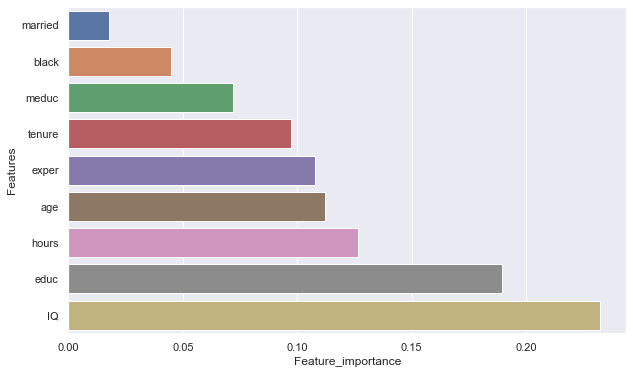

In [240]:
plt.figure(figsize=(10,6))
sns.barplot(y='Features', x='Feature_importance', data=FIM)

---

Comparing **RF** with LRM, KNN and SVM regression: 

* RMSE_test_RF  = \$344,137 (with max_depth=5, max_features=**sqrt**, n_estimators= 1000)
* RMSE_test_SVR = \$338,440 (with C=10000, gamma=1, kernel=**linear**)
* RMSE_test_LRM = \$337,937
* RMSE_test_KNN = \$373,209 (with K=54)

###  Additional links:


1. Decision Trees with sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Ensemble learning with sklearn: https://scikit-learn.org/stable/modules/ensemble.html
3. graphviz: this is used for Tree visualization: http://graphviz.org/
4. Out of Bag errors for random forest: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py

### We can show that on average, each bagged tree makes use of around 2/3 of the observations:

In [97]:
np.random.choice (100,size=100)

array([41,  1, 37, 88, 13, 55, 57, 35,  9, 52, 16, 57, 50,  9, 82, 47, 21,
       82, 32, 72, 57, 26,  5, 69, 66, 82, 37, 85, 27, 23, 92, 18, 22, 39,
       77, 48, 56, 26, 39, 82, 45, 16, 47, 27, 77, 60, 28, 10, 65, 30,  7,
       82, 56, 51, 58, 55, 56, 46,  4, 58, 46, 40, 30, 37, 50, 73,  6, 70,
       45, 14, 87, 18, 74, 59, 56, 78, 95, 69,  8, 45, 81, 74, 39, 54, 65,
       14, 99, 62, 91,  1, 73,  2, 92, 80, 82, 40, 59, 61, 19, 66])

In [104]:
np.unique(np.random.choice (100,size=100)).size

64